In [1]:
# Get the data
!cd .. && sh get-data.sh

% Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  198M  100  198M    0     0  21.4M      0  0:00:09  0:00:09 --:--:-- 22.1M


In [2]:
# iPython submodule autoreload
%load_ext autoreload
%autoreload 2

In [3]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

import skimage.io as skio

from utils import load_dataset
from keypoints import harris, select_keypoints, describe_keypoints, match_descriptors, get_fundamental_matrix

In [4]:
# Define constants
DATASET_PATH = "../data/parking"
LAST_FRAME = 598

In [5]:
get_image, ground_truth, K = load_dataset(DATASET_PATH, image_ratio=1)

## Part 1 - Initialization

Estimate relative pose of the camera

### Select initial frames

In [6]:
# Manually select two frames at the beginning of the dataset
i0 = get_image(0)
i1 = get_image(3)

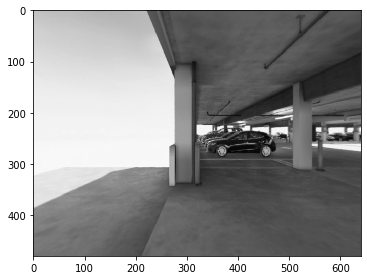

In [7]:
plt.figure()
skio.imshow(i0)

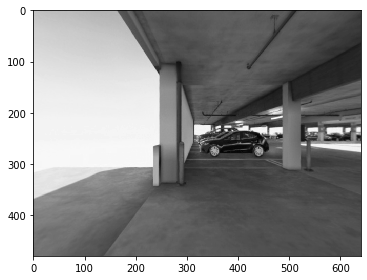

In [8]:
plt.figure()
skio.imshow(i1)

### Estabilish keypoint correspondences

In [9]:
harris_score = harris(i0)

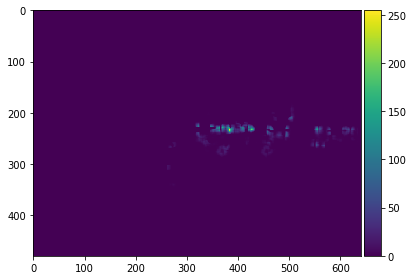

In [10]:
rescaled = harris_score * 255.0/harris_score.max()
plt.figure()
skio.imshow(rescaled)

In [11]:
keypoints = select_keypoints(harris_score)

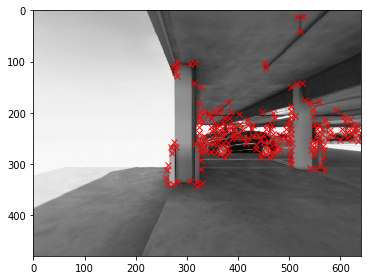

In [12]:
plt.figure()
skio.imshow(i0)
plt.plot(keypoints[:,1], keypoints[:,0], "rx")

In [13]:
desc_radius = 9

descriptors = describe_keypoints(i0, keypoints, desc_radius=desc_radius)

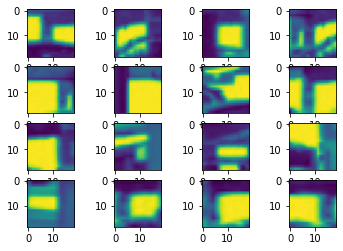

In [14]:
plt.figure()
for i in range(1, 17):
    plt.subplot(4, 4, i)
    p = 2 * desc_radius + 1
    plt.imshow(np.reshape(descriptors[i], [p, p]))

In [15]:
harris_2 = harris(i1)
keypoints_2 = select_keypoints(harris_2)
desc_2 = describe_keypoints(i1, keypoints_2, desc_radius=desc_radius)

In [16]:
dists = match_descriptors(desc_2, descriptors, match_lambda=6)

In [17]:
# [x, y] = query -> database 
dists.shape

(42, 2)

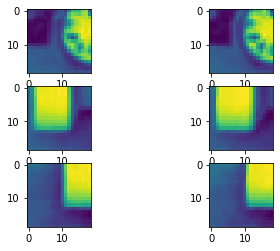

In [18]:
plt.figure()
for i in range(1, 7, 2):
    plt.subplot(3, 2, i)
    p = 2 * desc_radius + 1
    plt.imshow(np.reshape(descriptors[dists[i][1]], [p, p]))
    plt.subplot(3, 2, i+1)
    plt.imshow(np.reshape(desc_2[dists[i][0]], [p, p]))

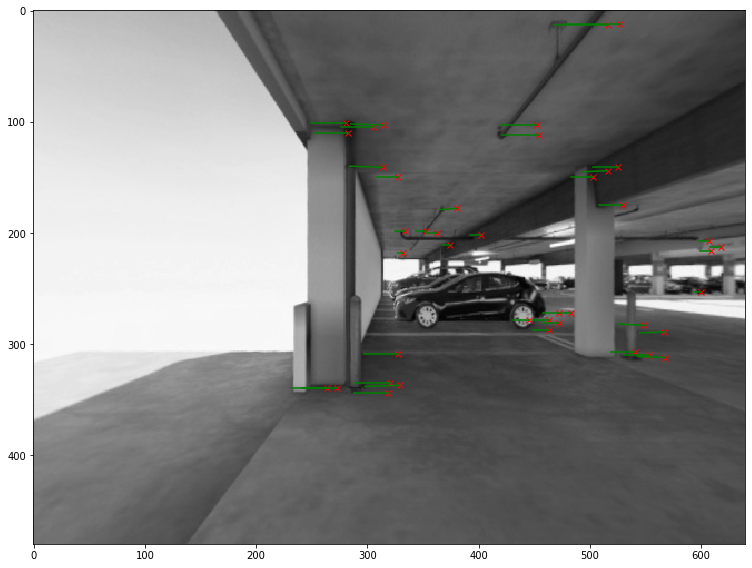

In [19]:
plt.figure(figsize=(17,8))

# plotting second image and differences from the first one
skio.imshow(i1)

# matches in the query image
matched_query = keypoints_2[dists[:,0]]

# matches in the db image
matched_db = keypoints[dists[:,1]]

# plot original matches in the updated image
plt.plot(matched_db[:,1], matched_db[:,0], "rx")

x_from = matched_db[:,1]
x_to = matched_query[:,1]

y_from = matched_db[:,0]
y_to = matched_query[:,0]

x = np.vstack([x_from, x_to])
y = np.vstack([y_from, y_to])

# show their paths in the new image
p = plt.plot(x, y, "g-")

In [20]:
model, inliers = get_fundamental_matrix(matched_query, matched_db)

query_inliers = matched_query[inliers]
db_inliers = matched_db[inliers]

# study what the 5 and 8 point algorithms are used for

In [28]:
len(matched_db[inliers])

42

In [29]:
inliers

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [ ]:
# TODO: estimate the camera pose